# Anxiety Model

This notebook is made to create the model of Anxiety Classification using TensorFlow.

## Import All Dependencies

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import os

## Download Dataset

Download Anxiety dataset from our github.

The dataset containing 39775 datas of answer from anxiety's questions.

In [2]:
!wget https://raw.githubusercontent.com/C22-PS315/mental-health-fitness/main/ml/Data%20Preparation/Anxiety.csv

--2022-05-30 03:35:02--  https://raw.githubusercontent.com/C22-PS315/mental-health-fitness/main/ml/Data%20Preparation/Anxiety.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1470823 (1.4M) [text/plain]
Saving to: ‘Anxiety.csv’

Anxiety.csv         100%[===================>]   1.40M  --.-KB/s    in 0.04s   

2022-05-30 03:35:02 (35.7 MB/s) - ‘Anxiety.csv’ saved [1470823/1470823]



In [3]:
anx = pd.read_csv('Anxiety.csv')
anx.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Scale_Anx
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,Sangat Parah
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,Parah
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,Sedang
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,Parah
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,Sangat Parah


## Convert Categorical Data to Numerical

Deep learning is based on statistical algorithms in which work with numbers. Therefore, we need to convert the categorical data into numerical form.

In One Hot Encoding, for each unique value in the categorical data, a new column is created. The integer encoded variable is removed and one new binary variable is added for each unique integer value. Each bit represents a possible category. If the variable cannot belong to multiple categories at once, then only one bit in the group can be “on” (1).

Use `pd.get_dummies(data, column=[], prefix='')` to convert the columns in the same DataFrame.

`pd.get_dummies()` = Convert categorical variable into dummy/indicator variables.

`column` = Column names in the DataFrame to be encoded.

`prefix` = String to append to DataFrame column names.

In [4]:
# One-Hot-Encoding the categorical data
anx = pd.get_dummies(anx, columns=['Scale_Anx'], prefix='', prefix_sep='')
anx.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Normal,Parah,Ringan,Sangat Parah,Sedang
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,0,0,0,1,0
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,0,1,0,0,0
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,0,0,0,0,1
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,0,1,0,0,0
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,1,0


## Split Dataset

Split the dataset into 80% for Training and 20% for Testing.

`frac` = Fraction of axis items to return. Percent of the sample.

`random_state` = Seed for random number generator.

In [5]:
train_data = anx.sample(frac=0.8, random_state=0)
test_data = anx.drop(train_data.index)

In [6]:
print(len(train_data), 'Data for training')
print(len(test_data), 'Data for testing')

31820 Data for training
7955 Data for testing


In [7]:
train_data.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Normal,Parah,Ringan,Sangat Parah,Sedang
33099,1,1,2,3,0,3,3,0,3,3,2,1,1,3,0,0,0,1,0
30943,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0
22923,1,1,0,1,0,2,1,0,1,1,1,1,2,0,0,0,0,0,1
3607,0,0,0,1,0,3,1,0,1,3,3,1,3,0,0,1,0,0,0
14589,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [8]:
train_data.shape

(31820, 19)

In [9]:
test_data.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Normal,Parah,Ringan,Sangat Parah,Sedang
10,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
11,2,1,0,3,0,3,2,0,2,1,2,2,2,0,0,0,0,1,0
13,3,1,0,1,0,0,0,1,0,2,2,3,3,1,0,1,0,0,0
19,1,0,0,2,0,1,3,0,0,0,1,0,0,0,0,0,1,0,0
21,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [10]:
test_data.shape

(7955, 19)

## Split The Features and Labels

Separate the target value, the "labels" from the features. The labels are the values that the model will be trained to predict.

Use `data.iloc[]` to select the specific column.

In [11]:
train = train_data.copy()
train_feats = train.iloc[:, :-5]
train_labels = train.iloc[:, -5:]

test = test_data.copy()
test_feats = test.iloc[:, :-5]
test_labels = test.iloc[:, -5:]

In [12]:
train_feats.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A
33099,1,1,2,3,0,3,3,0,3,3,2,1,1,3
30943,0,0,0,0,1,0,0,0,0,0,1,1,0,0
22923,1,1,0,1,0,2,1,0,1,1,1,1,2,0
3607,0,0,0,1,0,3,1,0,1,3,3,1,3,0
14589,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
train_feats.shape

(31820, 14)

In [14]:
train_labels.head()

,Normal,Parah,Ringan,Sangat Parah,Sedang
33099,0,0,0,1,0
30943,1,0,0,0,0
22923,0,0,0,0,1
3607,0,1,0,0,0
14589,1,0,0,0,0


In [15]:
train_labels.shape

(31820, 5)

In [16]:
test_feats.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A
10,0,0,0,0,1,0,0,0,0,0,1,0,0,0
11,2,1,0,3,0,3,2,0,2,1,2,2,2,0
13,3,1,0,1,0,0,0,1,0,2,2,3,3,1
19,1,0,0,2,0,1,3,0,0,0,1,0,0,0
21,0,0,0,1,1,0,0,0,0,0,0,0,1,0


In [17]:
test_feats.shape

(7955, 14)

In [18]:
test_labels.head()

,Normal,Parah,Ringan,Sangat Parah,Sedang
10,1,0,0,0,0
11,0,0,0,1,0
13,0,1,0,0,0
19,0,0,1,0,0
21,1,0,0,0,0


In [19]:
test_labels.shape

(7955, 5)

## Build Keras Sequential Model:

The model contains three Dense layers.

For the input shape, `train_f.shape[1]` = 14. The first two dense layers contain 15 and 10 nodes, respectively with relu activation function. The final dense layer contain 5 nodes, `train_l.shape[1]` = 5 and a softmax activation function for a classification task.

The model is trained using `categorical_crossentropy` loss function that work for multi-class classification model where there are two or more output labels. The model use `adam` optimizer and `accuracy` as the evaluation metric.

In [20]:
# Create Sequential Model.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, input_shape=(train_feats.shape[1], ), activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(train_labels.shape[1], activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                225       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 440
Trainable params: 440
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='categorical_crossentropy')

## Train the Model

In [22]:
history = model.fit(
    train_feats,
    train_labels,
    epochs=10,
    verbose=2, # Show all training logs
    validation_split = 0.2) # Calculate validation results on 20% of the training data.

Epoch 1/10
796/796 - 2s - loss: 0.8592 - accuracy: 0.6566 - val_loss: 0.4536 - val_accuracy: 0.8421 - 2s/epoch - 3ms/step
Epoch 2/10
796/796 - 1s - loss: 0.2965 - accuracy: 0.9125 - val_loss: 0.2071 - val_accuracy: 0.9604 - 1s/epoch - 1ms/step
Epoch 3/10
796/796 - 1s - loss: 0.1594 - accuracy: 0.9777 - val_loss: 0.1297 - val_accuracy: 0.9885 - 1s/epoch - 1ms/step
Epoch 4/10
796/796 - 1s - loss: 0.1053 - accuracy: 0.9922 - val_loss: 0.0933 - val_accuracy: 0.9983 - 1s/epoch - 1ms/step
Epoch 5/10
796/796 - 1s - loss: 0.0773 - accuracy: 0.9957 - val_loss: 0.0688 - val_accuracy: 0.9984 - 1s/epoch - 2ms/step
Epoch 6/10
796/796 - 2s - loss: 0.0577 - accuracy: 0.9973 - val_loss: 0.0507 - val_accuracy: 0.9992 - 2s/epoch - 3ms/step
Epoch 7/10
796/796 - 2s - loss: 0.0452 - accuracy: 0.9977 - val_loss: 0.0452 - val_accuracy: 0.9950 - 2s/epoch - 3ms/step
Epoch 8/10
796/796 - 1s - loss: 0.0360 - accuracy: 0.9982 - val_loss: 0.0342 - val_accuracy: 0.9994 - 1s/epoch - 2ms/step
Epoch 9/10
796/796 - 1s 

## Evaluate the Model

Evaluate the model on the test dataset `test_feats` and `test_labels`.

In [23]:
evaluation = model.evaluate(test_feats, test_labels, return_dict=True)
for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

249/249 [==============================] - 0s 1ms/step - loss: 0.0217 - accuracy: 0.9997
loss: 0.0217
accuracy: 0.9997


Plot the accuracy and loss for training and validation using `matplotlib.pyplot as plt`.

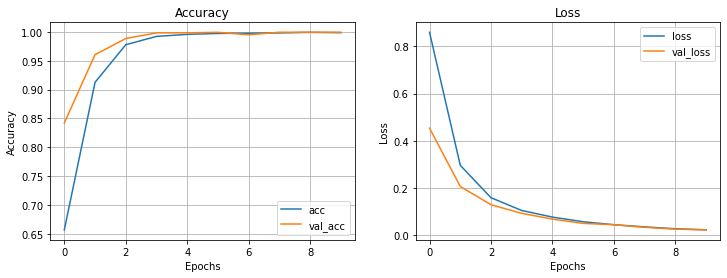

In [24]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

## Test the Model

Testing the model using test dataset `test_feats`.

The prediction result is displayed in 'scientific' format which is rather hard to read. 

`np.set_printoptions` is used for setting the printing options. Determine the way floating point numbers, arrays and other NumPy objects are displayed.

Use `np.printoptions(formatter={'float': '{: 0.1f}'.format})` to format the displayed prediction result into 1 number after decimal temporarily (Within the scope of *with* block and then restored the old options at the end.).

In [25]:
predictions = model.predict(test_feats)
print(predictions[10:16])

[[2.0642087e-06 1.3461329e-13 9.5627773e-01 1.7198752e-25 4.3720186e-02]
 [1.0000000e+00 0.0000000e+00 1.5551520e-09 0.0000000e+00 7.0353010e-20]
 [1.0000000e+00 0.0000000e+00 4.0298973e-09 0.0000000e+00 6.1025699e-19]
 [9.9999857e-01 1.8985597e-32 1.4145785e-06 0.0000000e+00 8.8179611e-15]
 [0.0000000e+00 2.0148345e-18 0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 2.3511340e-09 0.0000000e+00 2.1705992e-19]]


In [26]:
with np.printoptions(formatter={'float': '{: 0.1f}'.format}):
  print(predictions[10:16])

[[ 0.0  0.0  1.0  0.0  0.0]
 [ 1.0  0.0  0.0  0.0  0.0]
 [ 1.0  0.0  0.0  0.0  0.0]
 [ 1.0  0.0  0.0  0.0  0.0]
 [ 0.0  0.0  0.0  1.0  0.0]
 [ 1.0  0.0  0.0  0.0  0.0]]


In [27]:
test_labels[10:16]

,Normal,Parah,Ringan,Sangat Parah,Sedang
52,0,0,1,0,0
55,1,0,0,0,0
63,1,0,0,0,0
73,1,0,0,0,0
75,0,0,0,1,0
77,1,0,0,0,0


## Save Model

Use `tf.saved_model.save(model, model_path)` to save TensorFlow model.

In [28]:
model_path = 'anx_model'
tf.saved_model.save(model, model_path)

INFO:tensorflow:Assets written to: anx_model/assets


## Convert Model to TFLite

Use `tf.lite.TFLiteConverter.from_saved_model(model_path)` to convert the saved model into `.tflite` model for Android App use.

Then save the `.tflite` model.

In [29]:
# Convert the saved model into .tflite model
converter = tf.lite.TFLiteConverter.from_saved_model(model_path)
tflite_model = converter.convert()

# Save the .tflite model
os.makedirs('tflite_models')
with open('tflite_models/anx_model.tflite', 'wb') as f:
  f.write(tflite_model)

## Try The `.tflite` Model

Interpreter interface is used for running TensorFlow Lite models.

To run the `.tflite` model :

* Load the model into memory.

* Build an Interpreter based on an existing model.

* Set input tensor values.

* Invoke inference.

* Read output tensor values.

Build the interpreter by using `tf.lite.Interpreter(model_path)`.

In [30]:
interpreter = tf.lite.Interpreter(model_path='tflite_models/anx_model.tflite')
interpreter.allocate_tensors()


`interpreter.get_input_details()[0]["index"]` = Get the model's input tensor index in the interpreter.

`interpreter.get_output_details()[0]["index"]` = Get the model's output tensor index in the interpreter.

`interpreter.set_tensor(tensor_index, value)` = Set the values of the input tensor (get a copy).

`interpreter.get_tensor(tensor_index)` = Get the values of the output tensor (get a copy).

In [31]:
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [32]:
input_data = np.array([[2,	2,	2,	1,	3,	3,	3,	2,	2,	3,	3,	2,	2,	2]], dtype=np.float32)
interpreter.set_tensor(input_index, input_data)
interpreter.invoke()

print(interpreter.get_tensor(output_index))

[[0.0000000e+00 3.6372827e-15 0.0000000e+00 1.0000000e+00 1.9592095e-33]]


In [33]:
with np.printoptions(formatter={'float': '{: 0.1f}'.format}):
  print(interpreter.get_tensor(output_index))

[[ 0.0  0.0  0.0  1.0  0.0]]


## Download Saved Model

In [34]:
from google.colab import files

In [35]:
# Download TensorFlow saved model
!zip -r /content/anx_model.zip /content/anx_model
files.download('/content/anx_model.zip')

  adding: content/anx_model/ (stored 0%)
  adding: content/anx_model/saved_model.pb (deflated 88%)
  adding: content/anx_model/assets/ (stored 0%)
  adding: content/anx_model/variables/ (stored 0%)
  adding: content/anx_model/variables/variables.index (deflated 63%)
  adding: content/anx_model/variables/variables.data-00000-of-00001 (deflated 42%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
# Download .tflite Model
!zip -r /content/tflite_models.zip /content/tflite_models
files.download('/content/tflite_models.zip')

  adding: content/tflite_models/ (stored 0%)
  adding: content/tflite_models/anx_model.tflite (deflated 28%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>